In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/CustomerChurn.csv")
df.shape

(7043, 21)

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2797,6023-YEBUP,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.95,329.95,Yes
1527,0640-YJTPY,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1493.75,No
3420,8663-UPDGF,Female,0,No,No,26,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),69.50,1800.05,No
4068,3423-HHXAO,Female,0,Yes,Yes,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.50,272,No
5084,8966-OIQHG,Female,0,Yes,Yes,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.75,452.35,No
4776,0018-NYROU,Female,0,Yes,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,351.5,No
6186,4789-KWMXN,Male,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),110.85,5275.8,Yes
3341,1125-SNVCK,Female,1,No,No,49,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,43.80,2106.05,No
4139,7278-CKDNC,Male,1,No,No,24,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.50,2088.45,No
5269,5424-RLQLC,Male,0,No,No,10,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,59.65,638.95,No


Gender Distribution

We have both male and female customers. Analyzing their behavior separately might reveal different trends in service usage and churn rates. This segmentation can help tailor marketing and retention strategies to each gender group.

Senior Citizens

The SeniorCitizen column indicates if a customer is a senior citizen. Understanding the preferences and churn behavior of this group can help design age-appropriate services and support.

Social Aspects

Columns Partner and Dependents reflect the social dynamics of customers. Those with partners or dependents might have different service needs and churn behavior compared to those without.

Customer Tenure

The tenure column shows how long a customer has been with the service. Analyzing this against churn rates can identify critical periods where customers are more likely to leave. For example, are customers more likely to churn within the first few months or after a certain number of years?

Service Usage

Various service-related columns like PhoneService, MultipleLines, InternetService, and OnlineSecurity provide a view into what services are most popular. Bundling services and offering personalized packages based on usage patterns can enhance customer satisfaction.

Contracts and Billing

The Contract, PaperlessBilling, and PaymentMethod columns reveal customer preferences in payment and contract types. For instance, month-to-month contracts might have higher churn rates compared to one-year or two-year contracts. Offering incentives for longer contracts could improve retention.

Financial Overview

The MonthlyCharges and TotalCharges columns indicate the financial aspect of customer accounts. Analyzing how charges affect churn can help identify if high charges are driving customers away. Offering flexible payment plans or discounts could mitigate this.

Churn Analysis

The Churn column is crucial for understanding which customers are leaving. By analyzing this against other columns, patterns and trends can be identified, helping to create targeted strategies to reduce churn.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop(columns=["customerID"],inplace=True)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
for i in df.columns:
    print(f"{i}-------->",df[i].unique(),"--------->",df[i].dtypes)

gender--------> ['Female' 'Male'] ---------> object
SeniorCitizen--------> [0 1] ---------> int64
Partner--------> ['Yes' 'No'] ---------> object
Dependents--------> ['No' 'Yes'] ---------> object
tenure--------> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] ---------> int64
PhoneService--------> ['No' 'Yes'] ---------> object
MultipleLines--------> ['No phone service' 'No' 'Yes'] ---------> object
InternetService--------> ['DSL' 'Fiber optic' 'No'] ---------> object
OnlineSecurity--------> ['No' 'Yes' 'No internet service'] ---------> object
OnlineBackup--------> ['Yes' 'No' 'No internet service'] ---------> object
DeviceProtection--------> ['No' 'Yes' 'No internet service'] ---------> object
TechSupport--------> ['No' 'Yes' 'No internet service'] ---------> object
StreamingTV--------> ['No' 'Yes' 'No internet

datatypes

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
#total  charges is in object but actually we had in numeric

In [ ]:
df.replace(" ",np.nan,inplace=True)

In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.TotalCharges=pd.to_numeric(df["TotalCharges"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include="object").columns:
    df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Apply SelectKBest with ANOVA F-value for feature selection
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)


Selected features: Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [ ]:
data=df[selected_features]

In [ ]:
data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,2,0,0,0,1,29.85,29.85
1,0,34,2,0,2,0,1,0,56.95,1889.50
2,0,2,2,2,0,0,0,1,53.85,108.15
3,0,45,2,0,2,2,1,0,42.30,1840.75
4,0,2,0,0,0,0,0,1,70.70,151.65


In [ ]:
x=data

In [ ]:
x.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,2,0,0,0,1,29.85,29.85
1,0,34,2,0,2,0,1,0,56.95,1889.50
2,0,2,2,2,0,0,0,1,53.85,108.15
3,0,45,2,0,2,2,1,0,42.30,1840.75
4,0,2,0,0,0,0,0,1,70.70,151.65


In [ ]:
y=df['Churn']
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
x_train.shape

(5625, 10)

In [ ]:
y_train

,Churn
1413,0
7003,0
3355,0
4494,0
3541,0
...,...
3451,0
5123,1
4135,0
4249,0


In [ ]:
x_test

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
974,1,59,0,2,0,2,2,1,75.95,4542.35
619,0,7,0,2,0,0,0,1,78.55,522.95
4289,0,54,1,1,1,1,2,0,20.10,1079.45
3721,0,2,1,1,1,1,0,0,20.65,38.70
4533,0,71,0,2,2,0,2,1,105.15,7555.00
...,...,...,...,...,...,...,...,...,...,...
4829,0,12,0,0,0,0,0,1,45.00,524.35
5176,1,26,2,0,0,2,0,0,45.80,1147.00
2750,0,3,1,1,1,1,1,1,19.45,69.25
4432,0,37,2,2,0,2,2,1,40.55,1390.85


In [ ]:
y_test

,Churn
974,0
619,0
4289,0
3721,1
4533,0
...,...
4829,0
5176,0
2750,0
4432,0


In [ ]:
x_train.shape

(5625, 10)

In [ ]:
#checking all the columns are in numbers or not
for i in x.columns:
    print(f"{i}-------------->",x[i].unique(),x[i].dtypes)

Dependents--------------> [0 1] int64
tenure--------------> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
OnlineSecurity--------------> [0 2 1] int64
OnlineBackup--------------> [2 0 1] int64
DeviceProtection--------------> [0 2 1] int64
TechSupport--------------> [0 2 1] int64
Contract--------------> [0 1 2] int64
PaperlessBilling--------------> [1 0] int64
MonthlyCharges--------------> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] float64
TotalCharges--------------> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] float64


#bilding a simple Artificial nueral network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=tf.keras.Sequential([
      keras.layers.Dense(5,input_shape=(10,),activation="relu"),
      keras.layers.Dense(2,activation="relu"),
      keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#with tf.device('/gpu:0'):

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2762 - loss: 71.2180
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.6485
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7648 - loss: 0.6323
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7601 - loss: 0.6186
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7683 - loss: 0.6008


In [ ]:
model.evaluate(x_train,y_train)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.5927


[0.5926287770271301, 0.7624889016151428]

In [ ]:
y_pred=model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7649 - loss: 0.5913 


[0.5914154648780823, 0.7626155018806458]

In [ ]:
y_test[0:5]

,Churn
974,0
619,0
4289,0
3721,1
4533,0


In [ ]:
y_pred=[1 if i>0.5 else 0 for i in y_pred]

In [ ]:
y_pred[0:5]

[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))


[[1007   26]
 [ 308   66]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1033
           1       0.72      0.18      0.28       374

    accuracy                           0.76      1407
   macro avg       0.74      0.58      0.57      1407
weighted avg       0.75      0.76      0.71      1407



Text(50.722222222222214, 0.5, 'ACTUAL')

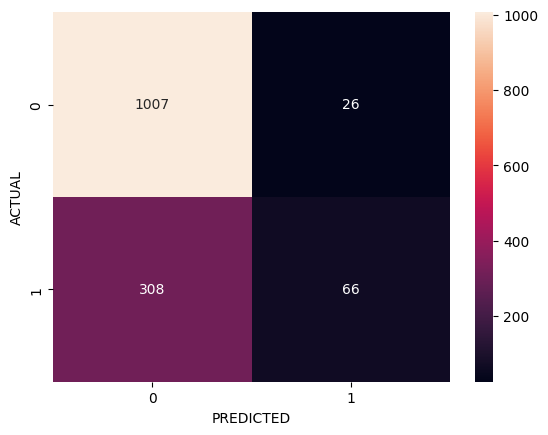

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

In [ ]:
len(df.columns)

20

In [ ]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [ ]:
df.Churn.value_counts()

,count
Churn,
0,5163
1,1869


METHOD1:Under sampling

In [ ]:
churn_0,churn_1=df.Churn.value_counts()

In [ ]:
churn_0,churn_1

(5163, 1869)

In [ ]:
count_0=df[df["Churn"]==0]

In [ ]:
df_class_0=count_0.sample(churn_1)
df_class_0.shape

(1869, 20)

In [ ]:
#taking minority
df_class_1=df[df["Churn"]==1]

**concatinating both undersampling datasets**

In [ ]:
df1=pd.concat([df_class_0,df_class_1],axis=0).reset_index(drop=True)

In [ ]:
df1.shape

(3738, 20)

In [ ]:
df1.tail(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80,1
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75,1
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25,1
3737,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
x=df1.drop("Churn",axis=1)
y=df1["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
x_train.shape

(2990, 19)

In [ ]:
model=tf.keras.Sequential([
      keras.layers.Dense(10,input_shape=(19,),activation="relu"),
    #   keras.layers.Dense(10,activation="relu"),
      keras.layers.Dense(5,activation="relu"),
      keras.layers.Dense(2,activation="relu"),
      keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#with tf.device('/gpu:0'):

model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4928 - loss: 80.4568
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4122 - loss: 7.1703
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - loss: 0.6944
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5006 - loss: 0.6945
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4812 - loss: 0.6962


METHOD2:OVER SAMPLING

In [1]:
#importing dataset
import pandas as pd
import numpy as np
df=pd.read_csv("/content/CustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [6]:
churn_no,churn_yes=df["Churn"].value_counts()

In [7]:
churn_no

5174

In [8]:
churn_yes

1869

oversampling of minority

In [16]:
# Assuming 'df' is your DataFrame
df_churn_yes = df[df["Churn"] == "Yes"].sample(n=churn_no, replace=True)
# Filtering the DataFrame for 'Yes' churn and then sampling.

In [18]:
df_churn_no=df[df["Churn"]=="No"]

In [20]:
df1=pd.concat([df_churn_no,df_churn_yes],axis=0).reset_index(drop=True)

In [21]:
df1.shape

(10348, 21)

In [22]:
df1.Churn.value_counts()

,count
Churn,
No,5174
Yes,5174


balanced both

#method-3
#Smote

In [23]:
from imblearn.over_sampling import SMOTE

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=["Churn", "Churn_Encoded"])
y = df["Churn_Encoded"]

In [41]:
sm=SMOTE(sampling_strategy="minority")
df_smote,y_smote=sm.fit_resample(X,y)

In [42]:
df_smote

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_encoded
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.850000,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.950000,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.850000,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.300000,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.700000,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,4722,1,0,0,0,30,0,0,0,0,...,1,0,2,2,0,0,2,61.923203,3014,1
10344,2723,0,0,0,0,19,0,1,0,0,...,0,0,1,2,0,0,2,64.181956,3017,1
10345,5388,1,0,0,0,3,0,1,0,0,...,0,0,1,1,0,1,2,42.281976,3797,1
10346,2257,0,0,0,0,8,1,1,0,0,...,0,0,0,1,0,0,1,80.895325,6232,1


In [44]:
y_smote

,Churn_Encoded
0,0
1,0
2,1
3,0
4,1
...,...
10343,1
10344,1
10345,1
10346,1


In [48]:
df_smote["Churn_encoded"].value_counts()

,count
Churn_encoded,
0,5174
1,5174
